# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we will explore the cleaned dataset that we prepared earlier in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb). The dataset contains information about patients, including their age, gender, cognitive test scores, health status, and lifestyle habits.
Our goal is to understand how these different features relate to the diagnosis of Alzheimer’s disease. We will look at distributions, compare groups, and study relationships between variables to find out which features are most useful for predicting the risk of Alzheimer’s.

This step is important because it helps us decide which data to use in the machine learning model that we will build later in Notebook 4 (04_Model_Training_and_Evaluation). It also supports our overall project goal of using Business Intelligence and AI to help doctors identify people who might be at risk earlier.

In this notebook, we explore the cleaned dataset to discover patterns, trends, and relationships between features and the Alzheimer's diagnosis.
The goal is to understand which features might be useful for building a predictive model in the next step.

## Understanding Values in the Cleaned Dataset
The dataset we are working with has been cleaned and is now ready for analysis and modeling. All missing values have been handled, and the structure is complete. The features describe various aspects of each patient’s health, habits, and cognitive condition. Below is a breakdown of the columns grouped by category. This overview helps us understand what each variable represents and how it fits into the overall picture of Alzheimer’s risk. These categories guide us as we choose which features to analyze, scale, or model.

#### Demographics
- **PatientID** – Unique identifier for each patient (not used for prediction)  
- **Age** – Patient’s age, mostly between 60 and 90  
- **Gender** – 0 = Male, 1 = Female  
- **Ethnicity** – 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other  
- **EducationLevel** – 0 to 3, where higher numbers represent more education  

#### Lifestyle
- **Smoking** – 0 = No, 1 = Yes  
- **AlcoholConsumption** – Numeric value showing amount of alcohol consumed  
- **PhysicalActivity** – Activity level score  
- **DietQuality** – Diet health score  
- **SleepQuality** – Sleep health score  
- **BMI** – Body Mass Index  

#### Medical History
- **FamilyHistoryAlzheimers** – 0 = No, 1 = Yes (genetic link)  
- **CardiovascularDisease** – 0 = No, 1 = Yes  
- **Diabetes** – 0 = No, 1 = Yes  
- **Depression** – 0 = No, 1 = Yes  
- **HeadInjury** – 0 = No, 1 = Yes  
- **Hypertension** – 0 = No, 1 = Yes  

#### Clinical Values
- **SystolicBP** – Systolic blood pressure  
- **DiastolicBP** – Diastolic blood pressure  
- **CholesterolTotal** – Total cholesterol  
- **CholesterolLDL** – "Bad" cholesterol  
- **CholesterolHDL** – "Good" cholesterol  
- **CholesterolTriglycerides** – Another cholesterol type  

#### Cognitive and Functional Assessments
- **MMSE** – Mini-Mental State Exam score (0–30)  
- **FunctionalAssessment** – Measures daily function  
- **ADL** – Activities of Daily Living score  
- **MemoryComplaints** – 0 = No, 1 = Yes  
- **BehavioralProblems** – 0 = No, 1 = Yes  

#### Symptoms and Behavior
- **Confusion** – 0 = No, 1 = Yes  
- **Disorientation** – 0 = No, 1 = Yes  
- **PersonalityChanges** – 0 = No, 1 = Yes  
- **DifficultyCompletingTasks** – 0 = No, 1 = Yes  
- **Forgetfulness** – 0 = No, 1 = Yes  

#### Target
- **Diagnosis** – This is the target column: 0 = No Alzheimer’s, 1 = Alzheimer’s  

#### Removed Column
- **DoctorInCharge** – Removed due to containing anonymized text, not relevant for analysis  

---------------------------------

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

**1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?**
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.

**2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.

---------------------------

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [5]:
# Add the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Import custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Import commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Run environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


-------------------------

## Load Dataset

In [ ]:
We load our cleaned dataset

In [9]:
df = pd.read_csv("../data/alzheimers_clean.csv")
print("Cleaned dataset loaded. Shape:", df.shape)

Cleaned dataset loaded. Shape: (2149, 33)


--------------------

## Distribution of the Target Variable: Diagnosis

We begin by examining the distribution of our target variable, Diagnosis, where:
- 0 = No Alzheimer's
- 1 = Alzheimer's

This helps us check whether the dataset is balanced or skewed, which can affect modeling accuracy.


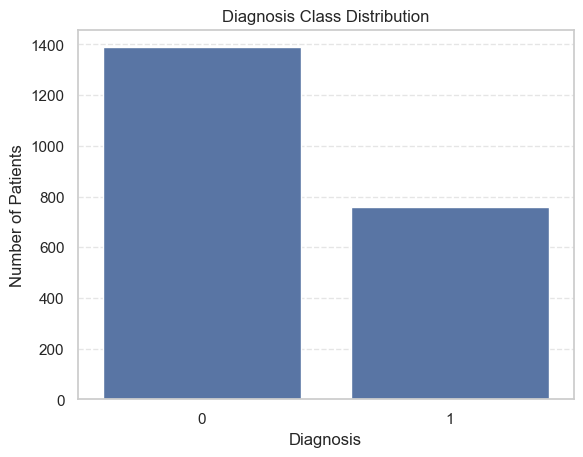

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [17]:
#Diagnosis countplot
sns.countplot(data=df, x="Diagnosis")
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Display raw counts
df["Diagnosis"].value_counts()

## Binary Features by Diagnosis
Binary features such as Confusion, Depression, or Hypertension may be associated with Alzheimer's diagnosis. We calculate the percentage of positive cases (value = 1) within each diagnosis group to find potential patterns.

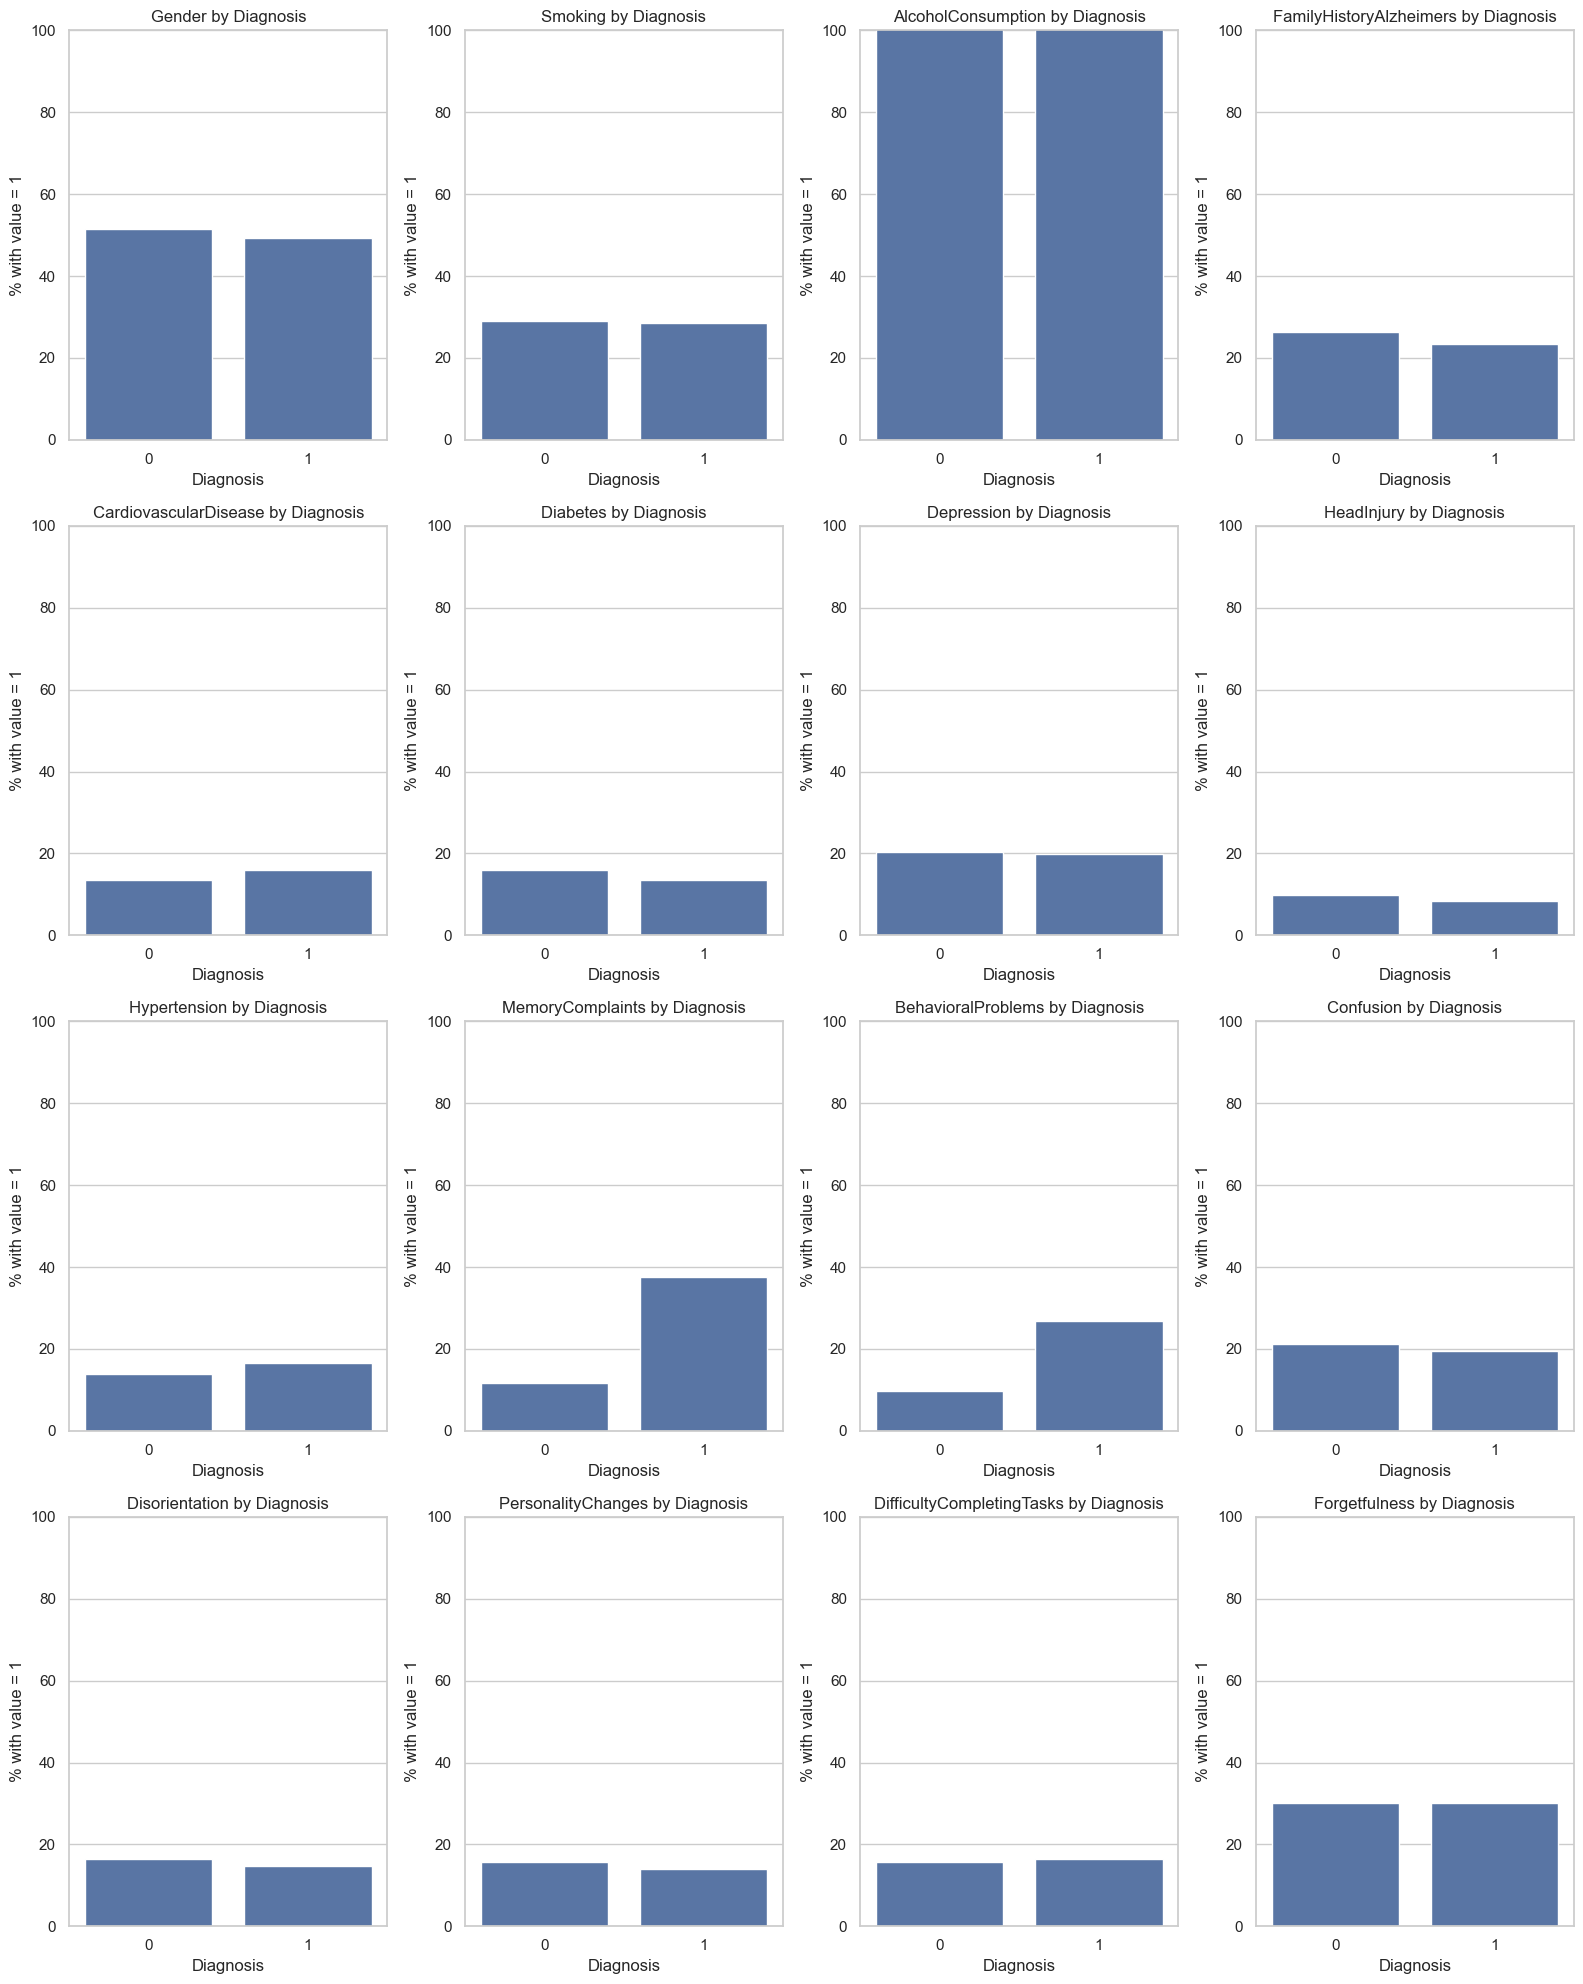

In [70]:
binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

plt.figure(figsize=(16, 20))
for idx, feature in enumerate(binary_features):
    plt.subplot(4, 4, idx + 1)
    values = df.groupby("Diagnosis")[feature].mean() * 100
    sns.barplot(x=values.index, y=values.values)
    plt.title(f"{feature} by Diagnosis")
    plt.ylabel("% with value = 1")
    plt.xlabel("Diagnosis")
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()

------------------------

## Distribution of Continuous Features

Next, we look at the overall distribution of continuous features. This helps detect skewness, spread, and outliers.

### Histograms of continuous features

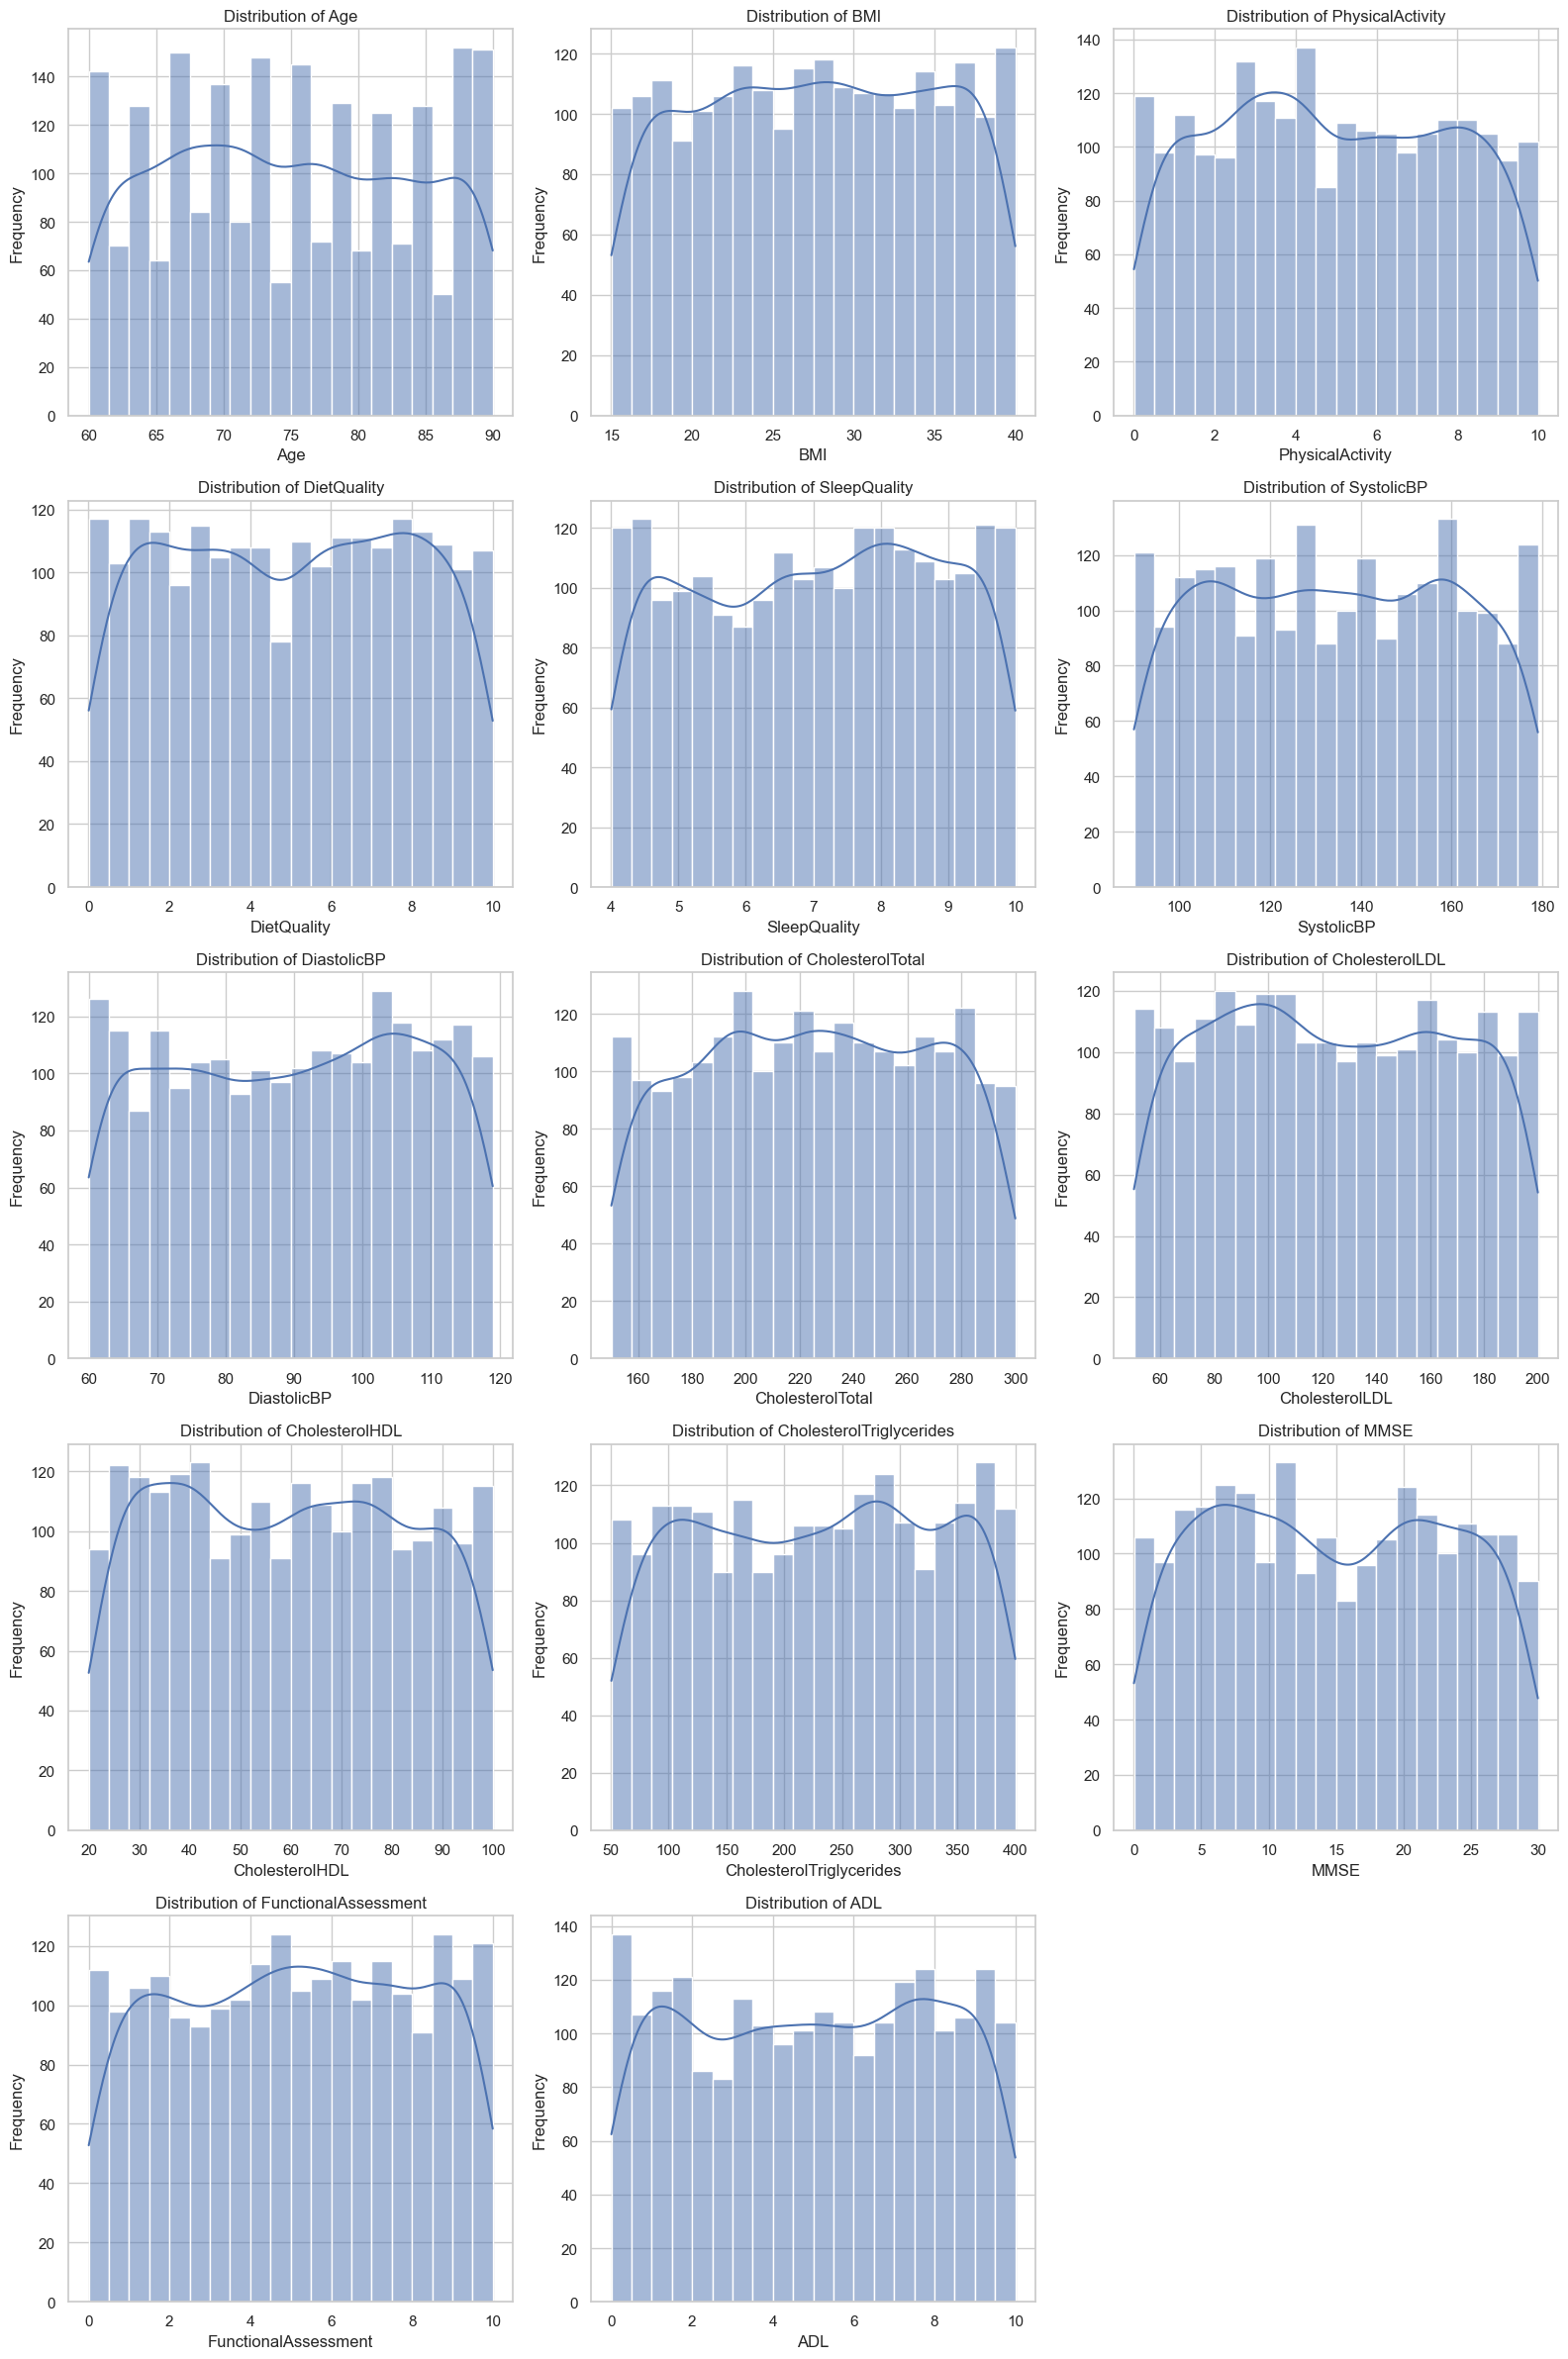

In [75]:
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]

plt.figure(figsize=(16, 24))
for idx, feature in enumerate(continuous_features):
    plt.subplot(5, 3, idx + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Boxplots by diagnosis
Boxplots help compare how the distribution of continuous features differs between the two diagnosis groups. This is useful for identifying features that separate the classes well.

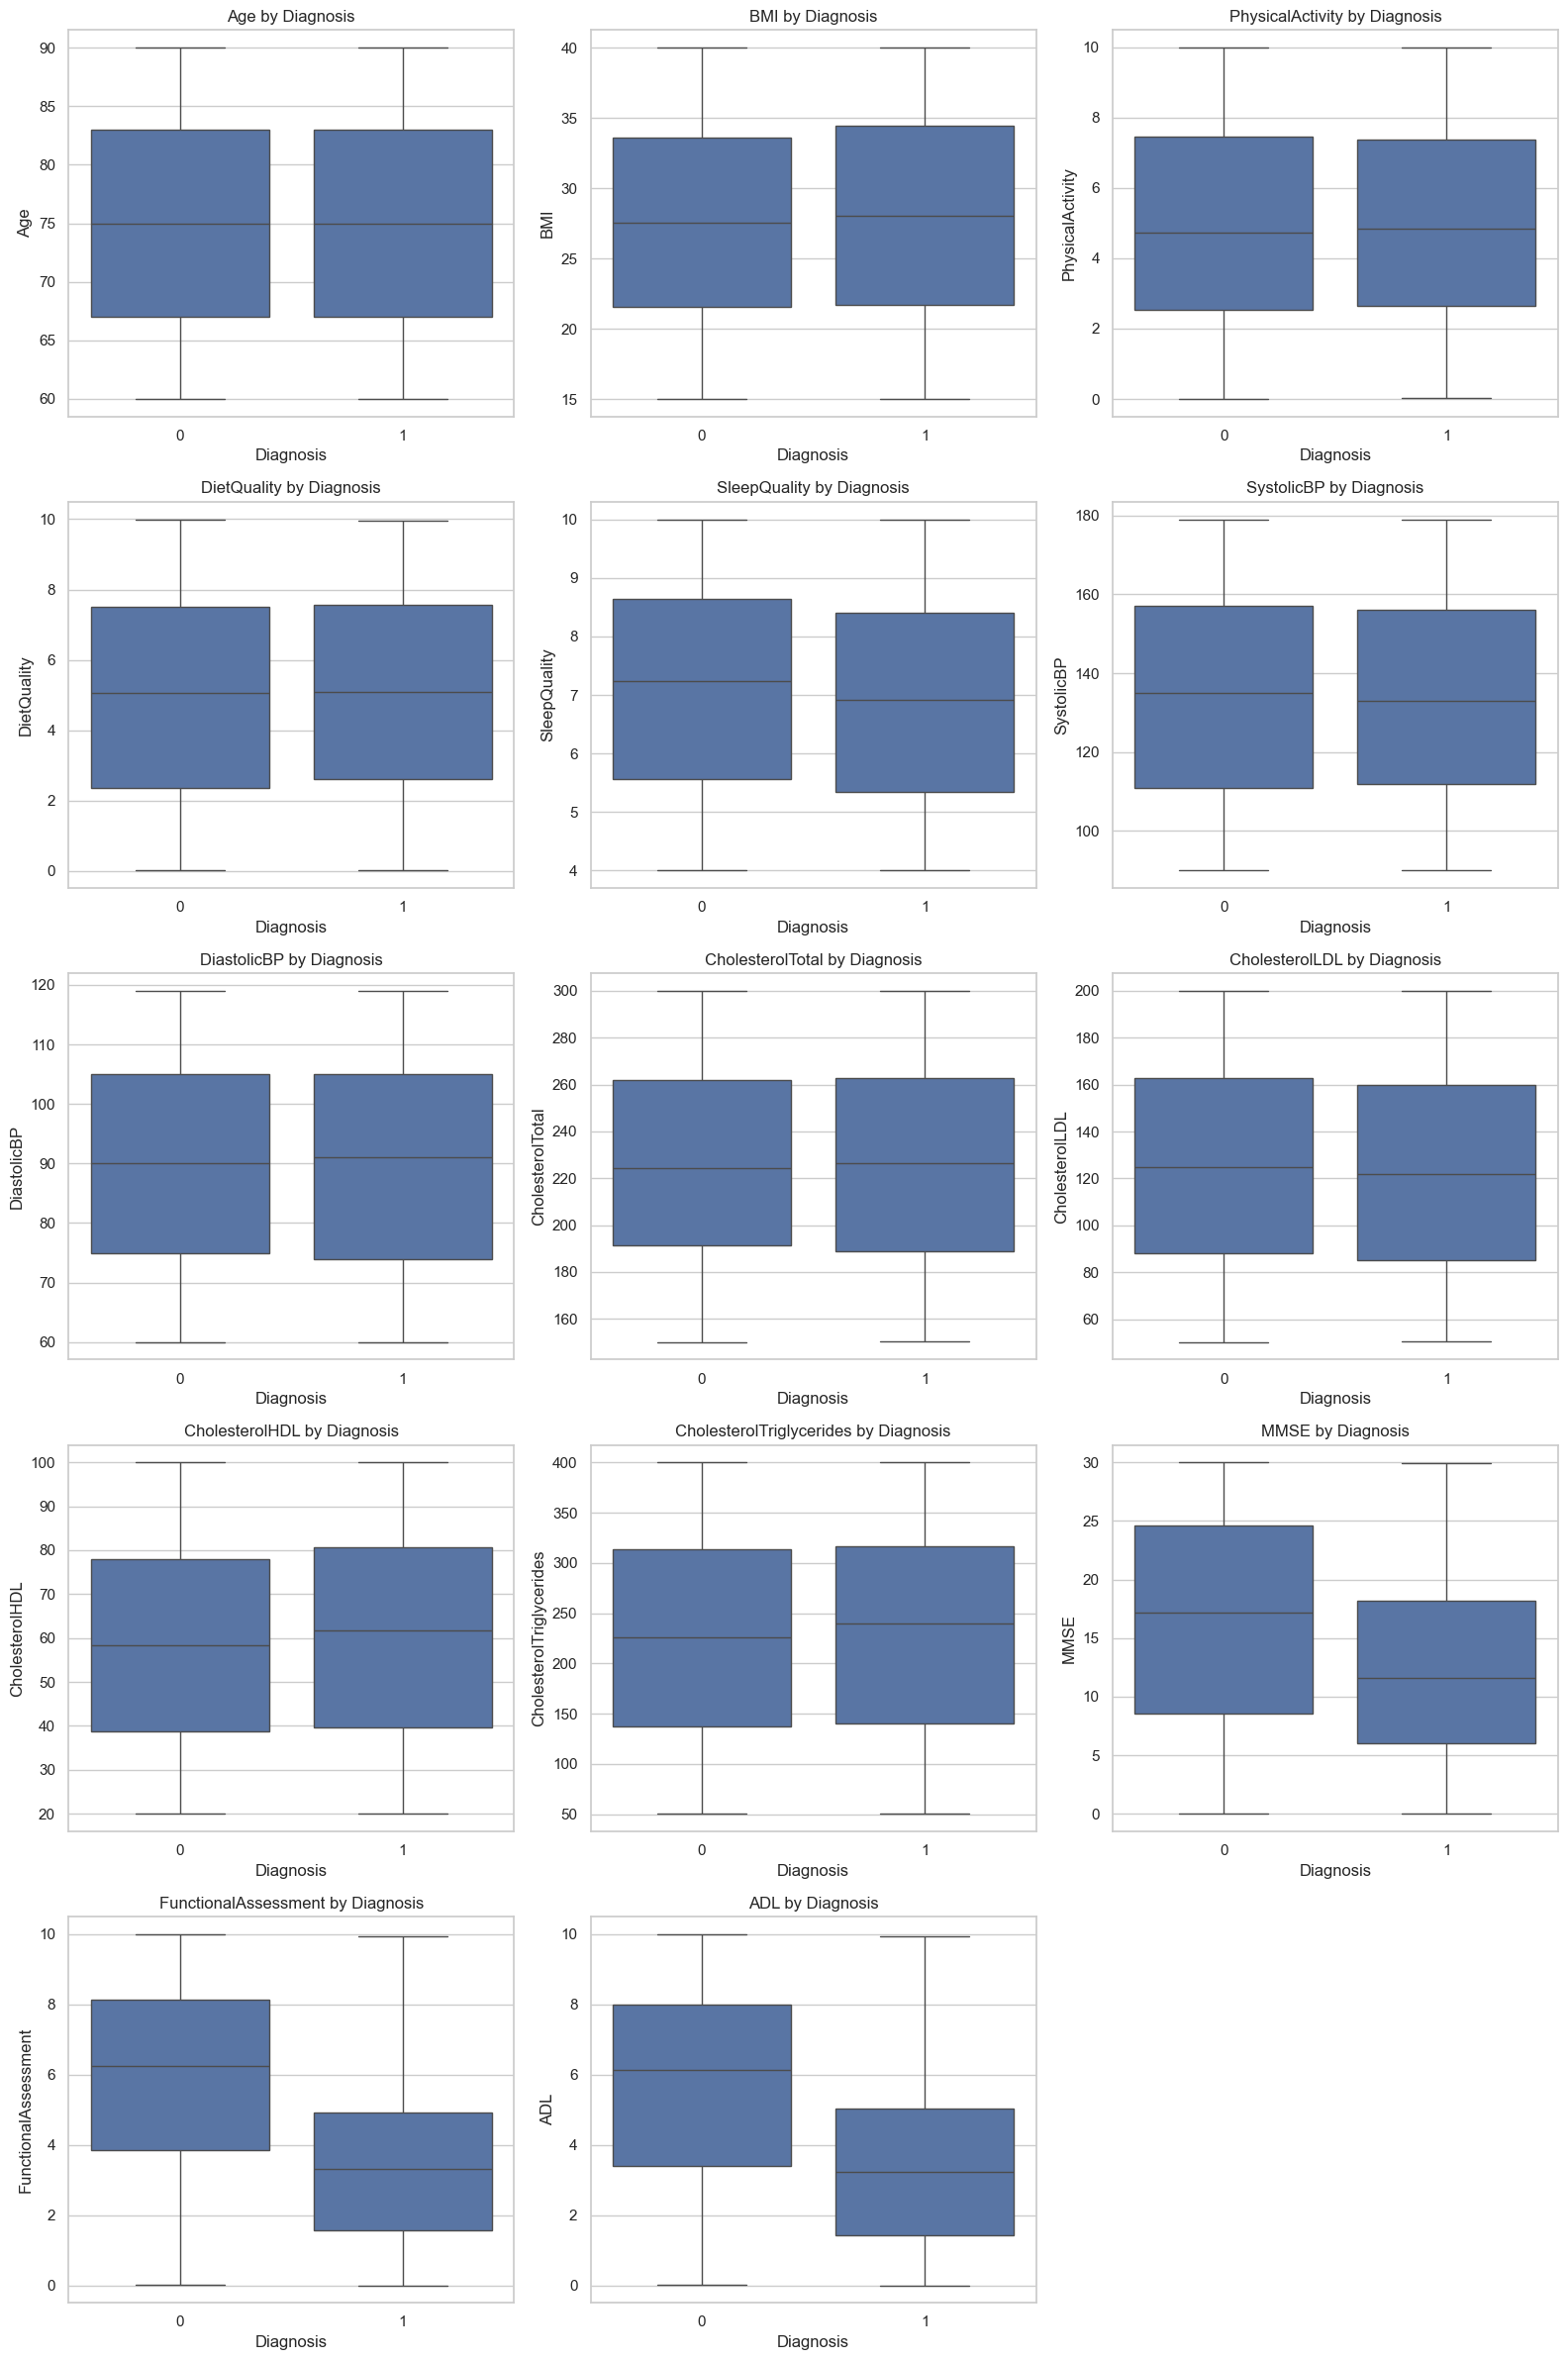

In [79]:
plt.figure(figsize=(16, 24))
for idx, feature in enumerate(continuous_features):
    plt.subplot(5, 3, idx + 1)
    sns.boxplot(data=df, x="Diagnosis", y=feature)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

--------------

## Lifestyle Features by Diagnosis

Lifestyle variables such as diet, exercise, and sleep may affect cognitive health. Here we explore how these features vary between diagnosed and non-diagnosed patients.

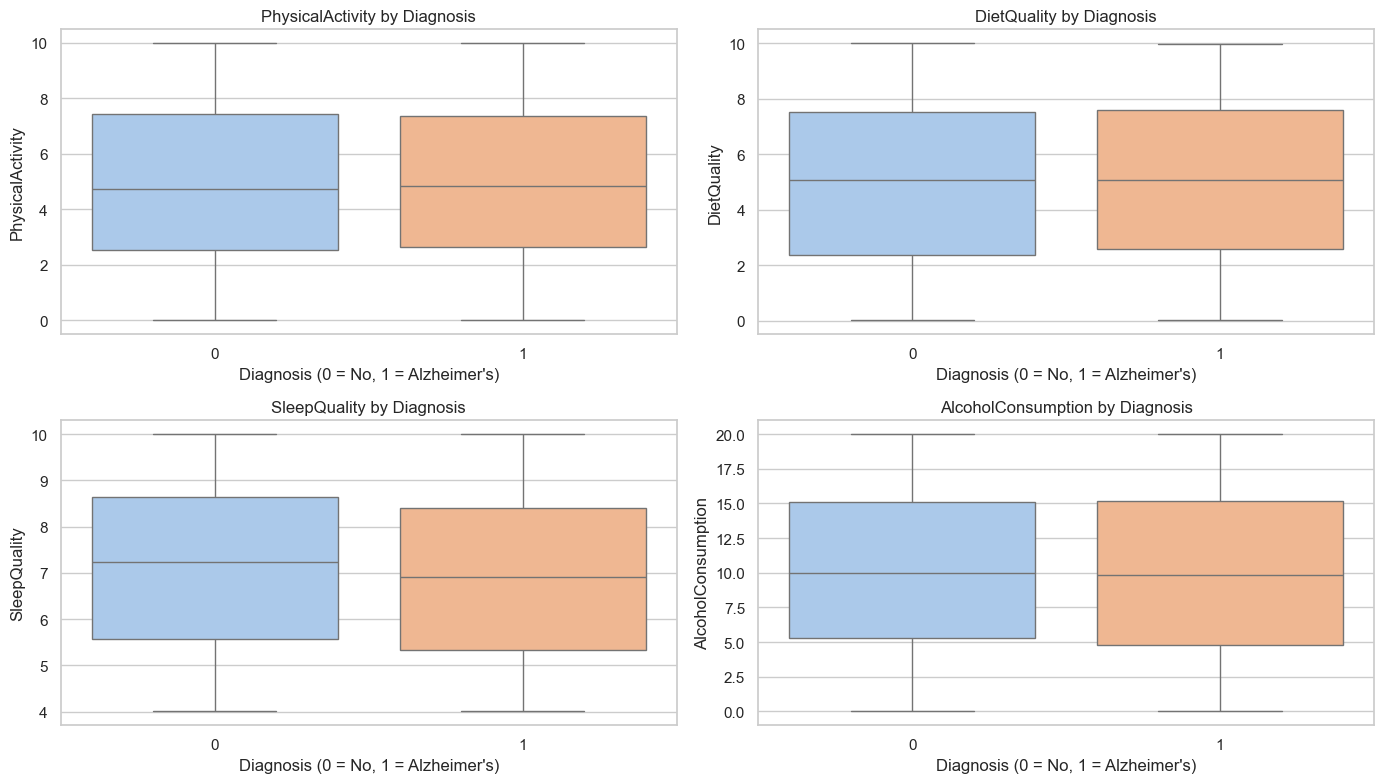

In [98]:
# Define lifestyle-related features
lifestyle_features = ["PhysicalActivity", "DietQuality", "SleepQuality", "AlcoholConsumption"]

# Set Seaborn theme
sns.set(style="whitegrid")

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Plot each boxplot
for idx, feature in enumerate(lifestyle_features):
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        hue="Diagnosis",           # Added to suppress warning
        palette="pastel",
        ax=axes[idx],
        legend=False               # Prevents duplicate legends
    )
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=12)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

## Cholesterol Levels by Diagnosis

Cholesterol levels may relate to cardiovascular and brain health. We visualize how different cholesterol markers vary across diagnosis classes.

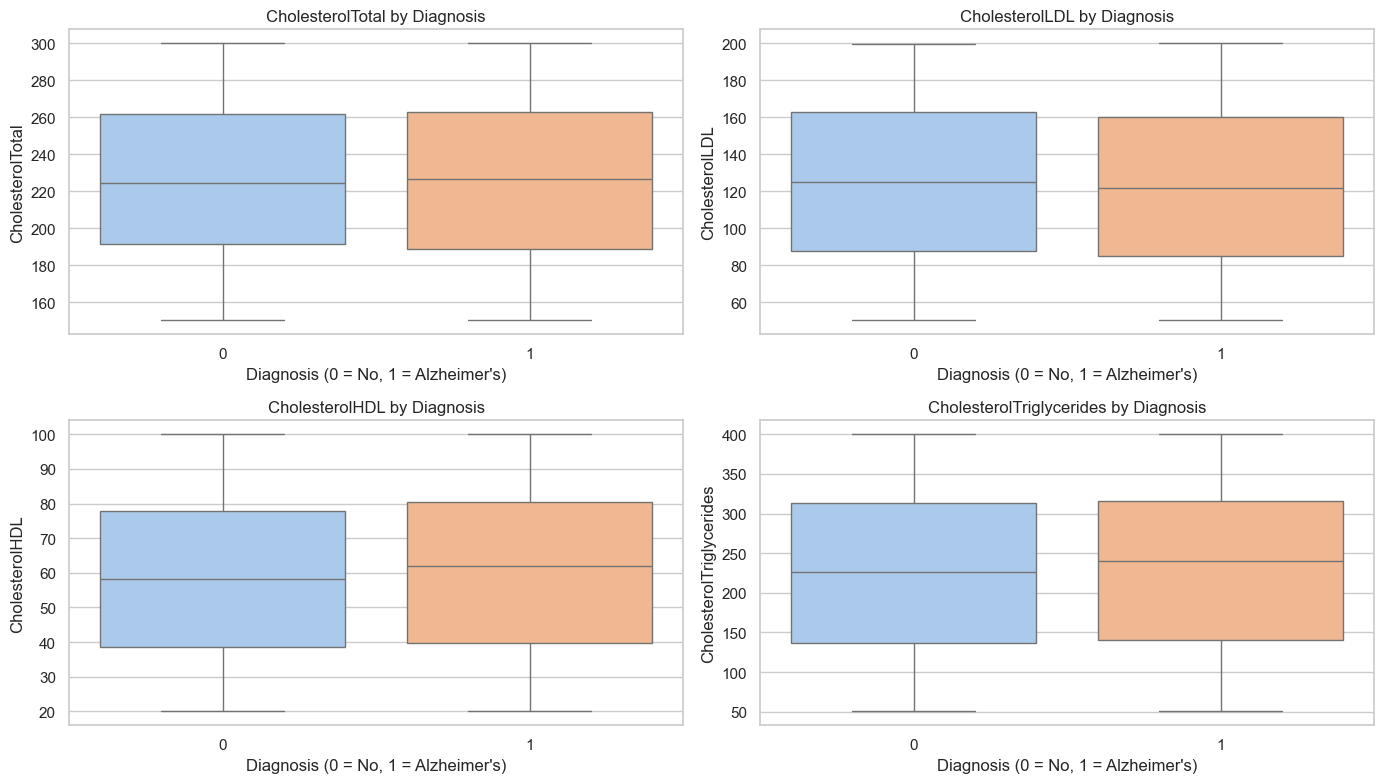

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define cholesterol-related features
cholesterol_features = ["CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]

# Set Seaborn style
sns.set(style="whitegrid")

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Plot each boxplot
for idx, feature in enumerate(cholesterol_features):
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        hue="Diagnosis",           # Fixes the FutureWarning
        palette="pastel",
        ax=axes[idx],
        legend=False               # Hide redundant legends
    )
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=12)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

------------------------------------

### Correlation Matrix

The correlation matrix helps identify which features are closely related. We also look for strong correlations with the Diagnosis variable, which may indicate useful predictors.

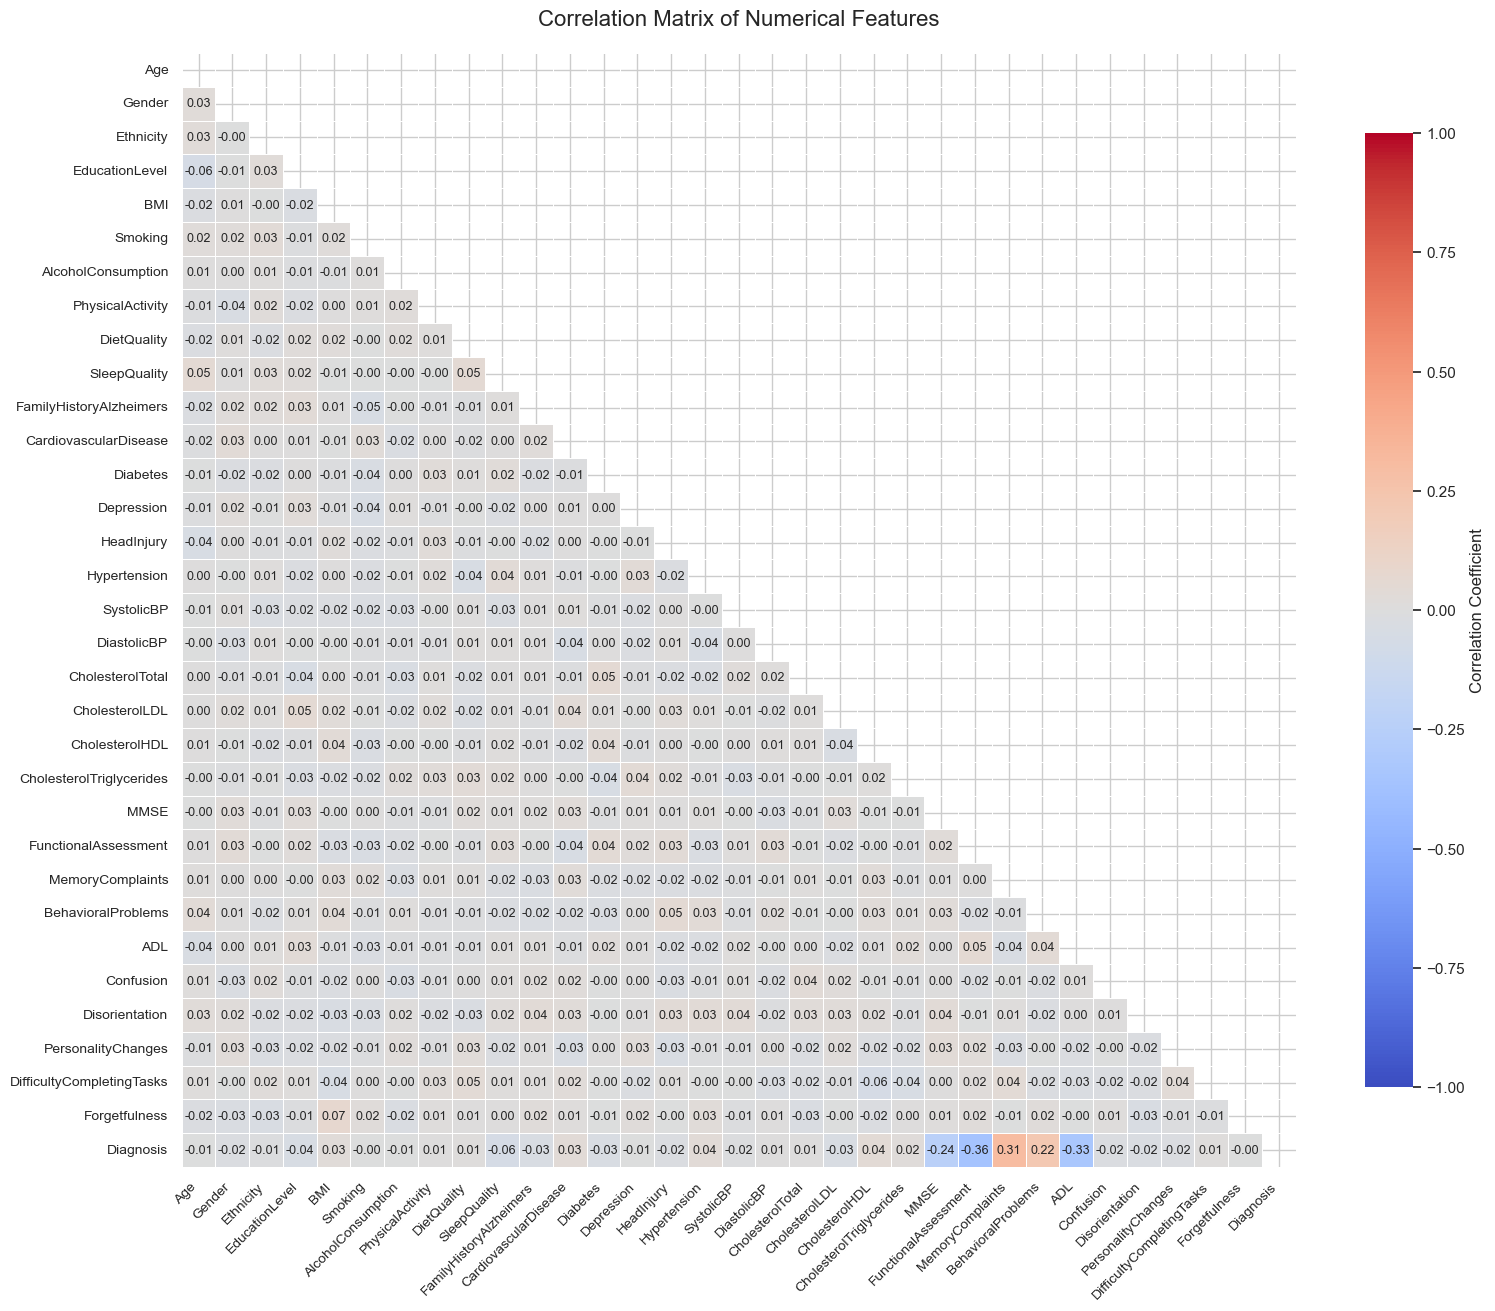

In [92]:
# Calculate correlation matrix (only for numerical columns)
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    annot_kws={"size": 9}
)

# Customize the plot
plt.title("Correlation Matrix of Numerical Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

## Key Predictive Features by Diagnosis

From the correlation matrix and earlier analysis, MMSE, FunctionalAssessment, and ADL show strong differences between diagnosis groups. We visualize them again with violin plots to emphasize their distribution and class separation.

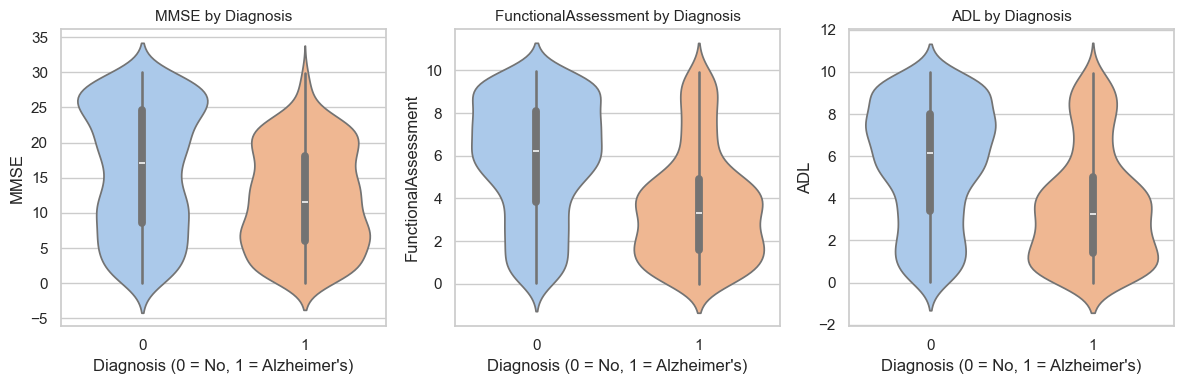

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key cognitive/functional features
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each violinplot
for idx, feature in enumerate(key_features):
    sns.violinplot(
        data=df,
        x="Diagnosis",
        y=feature,
        hue="Diagnosis",         # Fixes the warning
        inner="box",
        palette="pastel",
        ax=axes[idx],
        legend=False             # Hides legend since x and hue are same
    )
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=11)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

### Correlation Observations
From the correlation matrix, we can make several observations:

MMSE, FunctionalAssessment, and ADL show strong negative correlations with the Diagnosis variable. This suggests that lower scores on these cognitive and functional assessments are associated with a higher likelihood of Alzheimer's.

Disorientation, Forgetfulness, and Confusion show positive correlations with Diagnosis. These features appear more often among patients who are diagnosed.

Other clinical variables like cholesterol levels and blood pressure show weaker correlations, indicating they may have less predictive power on their own.

These patterns help identify which features may be most valuable for modeling.


In [ ]:
## Key Predictive Features by Diagnosis

We now focus on three features that showed strong relationships with the target variable Diagnosis in the earlier correlation analysis: MMSE, FunctionalAssessment, and ADL. These are clinical and cognitive assessments often used to evaluate Alzheimer’s-related symptoms.

Boxplots below show how these scores vary across the two diagnosis classes.

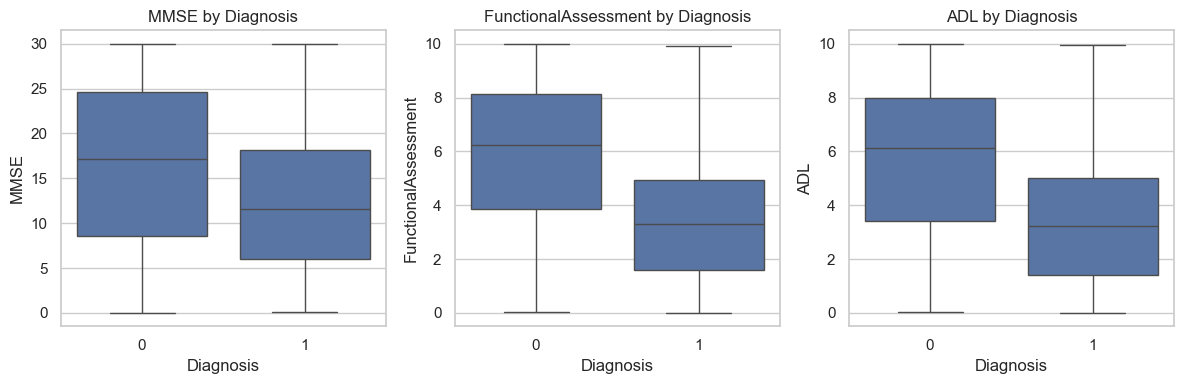

In [64]:
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

plt.figure(figsize=(12, 4))
for idx, feature in enumerate(key_features):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(data=df, x="Diagnosis", y=feature)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Observations
MMSE scores are clearly lower in the diagnosed group, showing strong separation between classes.

FunctionalAssessment and ADL also drop significantly for Alzheimer’s patients.

These patterns confirm that these features are highly relevant for modeling and likely to improve predictive performance.

## Visual Comparison of Top Predictive Features

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=fe

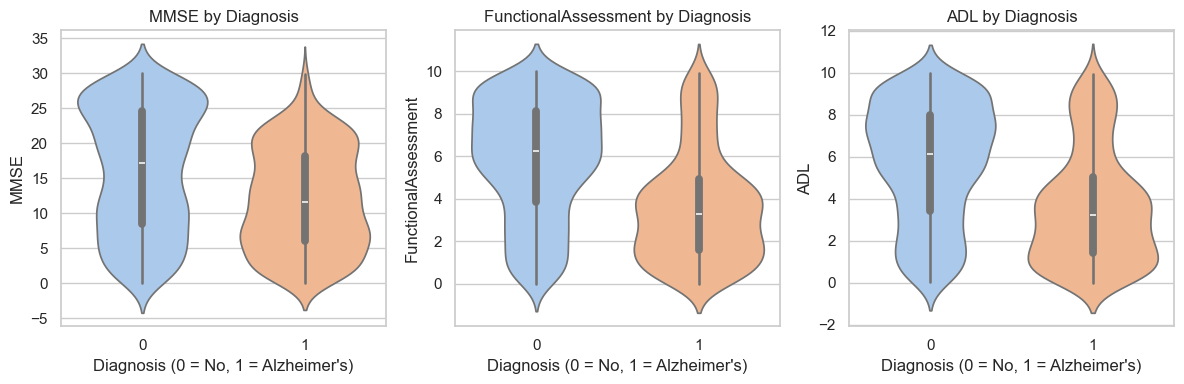

In [32]:
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

plt.figure(figsize=(12, 4))
for idx, feature in enumerate(key_features):
    plt.subplot(1, 3, idx + 1)
    sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Interpreting MMSE, FunctionalAssessment, and ADL by Diagnosis
This set of plots shows how scores for MMSE, FunctionalAssessment, and ADL differ between patients who have been diagnosed with Alzheimer's and those who have not.

Key takeaways:

- MMSE scores are noticeably lower for patients diagnosed with Alzheimer's. The separation between the two groups is clear, which makes this feature a strong indicator of cognitive decline.

- FunctionalAssessment and ADL scores are also lower in the diagnosed group. This suggests that people with Alzheimer's have more difficulty with daily tasks and lower overall independence.

- All three features show meaningful differences between the groups. This makes them strong candidates for use in a predictive model, especially when combined with other clinical and behavioral variables.

## Lifestyle Factors and Diagnosis
Lifestyle features such as diet, exercise, and sleep are often linked to brain health. In this section, we explore how these variables differ between patients with and without Alzheimer's.

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/695405732.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel", ax=axes[idx])
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/695405732.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel", ax=axes[idx])
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/695405732.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=featur

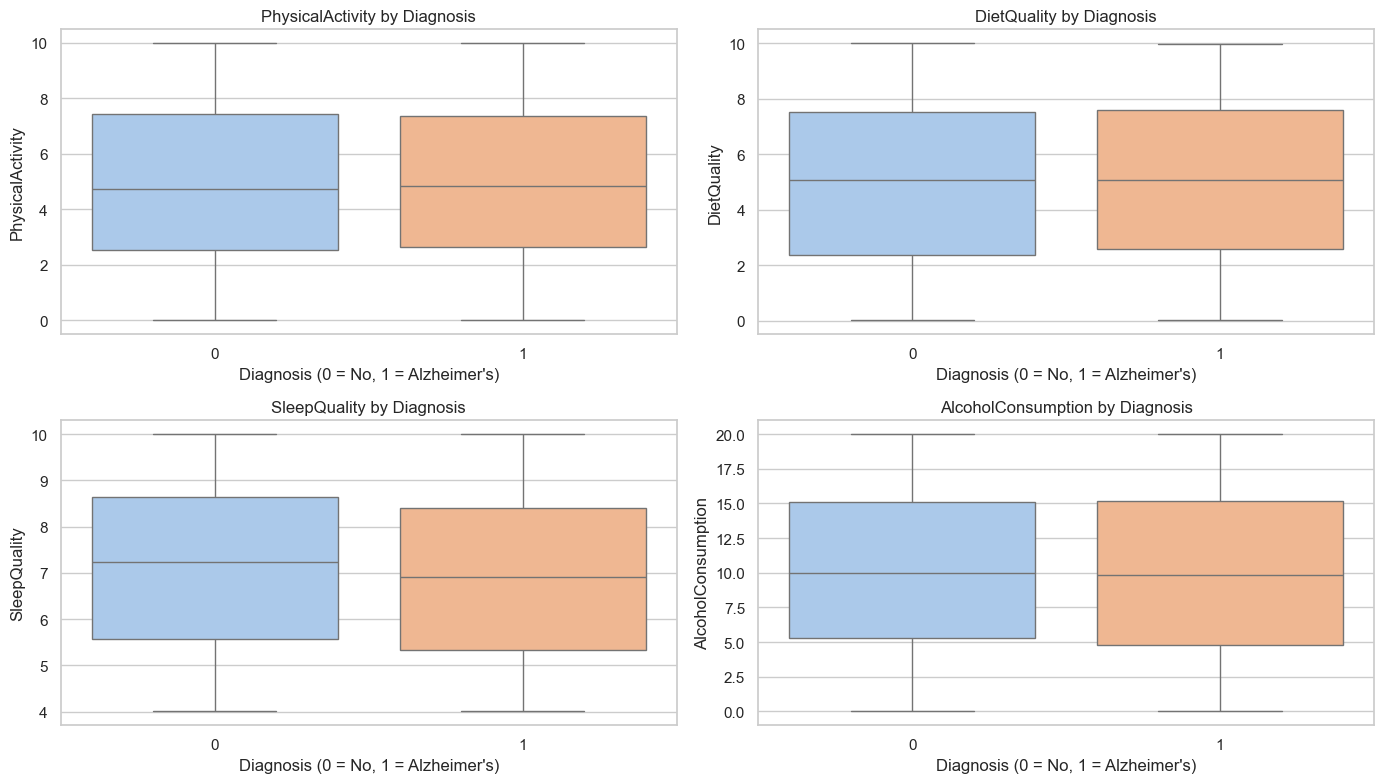

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define lifestyle-related features
lifestyle_features = ["PhysicalActivity", "DietQuality", "SleepQuality", "AlcoholConsumption"]

# Set Seaborn theme
sns.set(style="whitegrid")

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each feature
for idx, feature in enumerate(lifestyle_features):
    sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel", ax=axes[idx])
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=12)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()


-----------------------

## Cholesterol Profiles by Diagnosis

Cholesterol imbalances are linked to cardiovascular health, which can affect brain health. Here we examine how cholesterol levels vary between diagnosis groups.

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/1283415616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/1283415616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/1283415616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel")
/var/fo

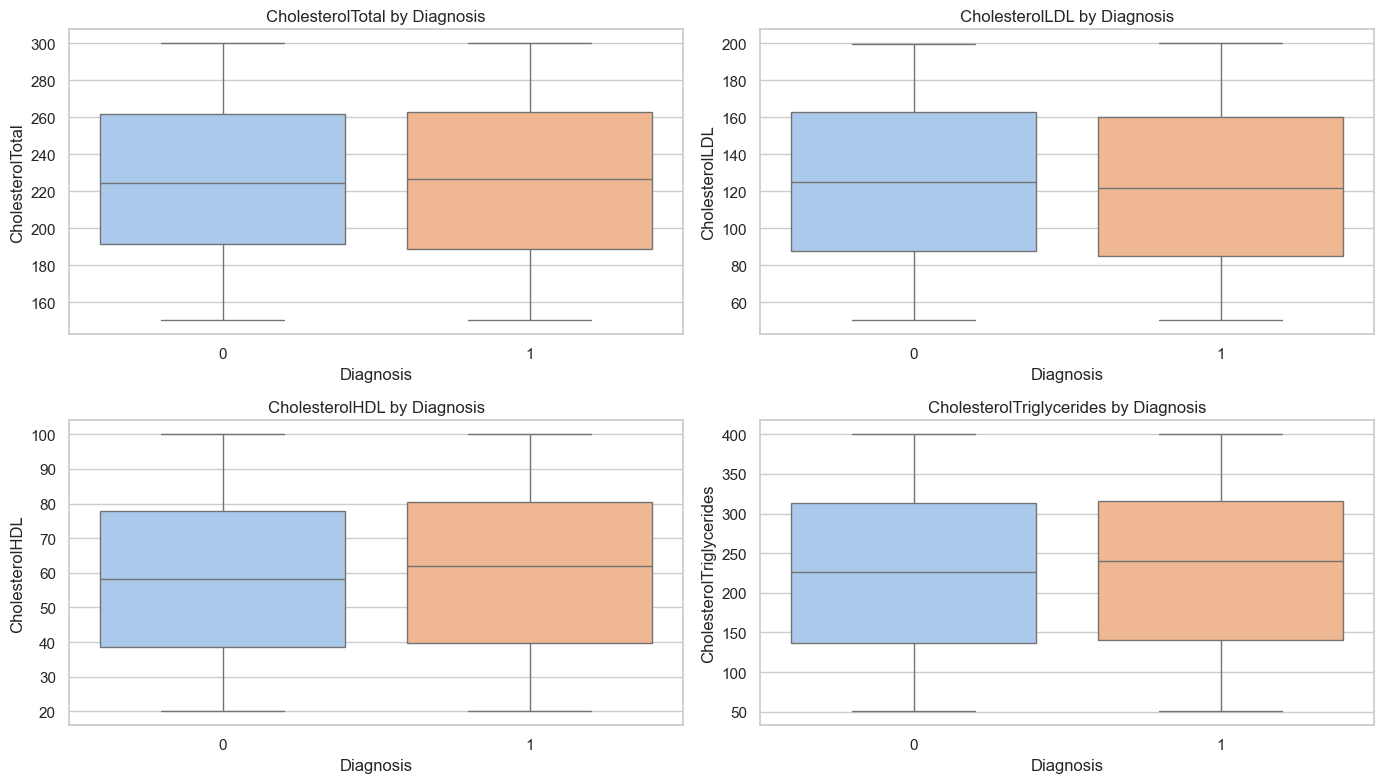

In [49]:
cholesterol_features = ["CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]

plt.figure(figsize=(14, 8))
for idx, feature in enumerate(cholesterol_features):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(data=df, x="Diagnosis", y=feature, palette="pastel")
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## Pairplot of Top Features

Shows relationships and class separation in 2D.

## Feature Relationships and Separation

This pairplot helps us understand how key features interact and whether they separate well between diagnosed and non-diagnosed patients.

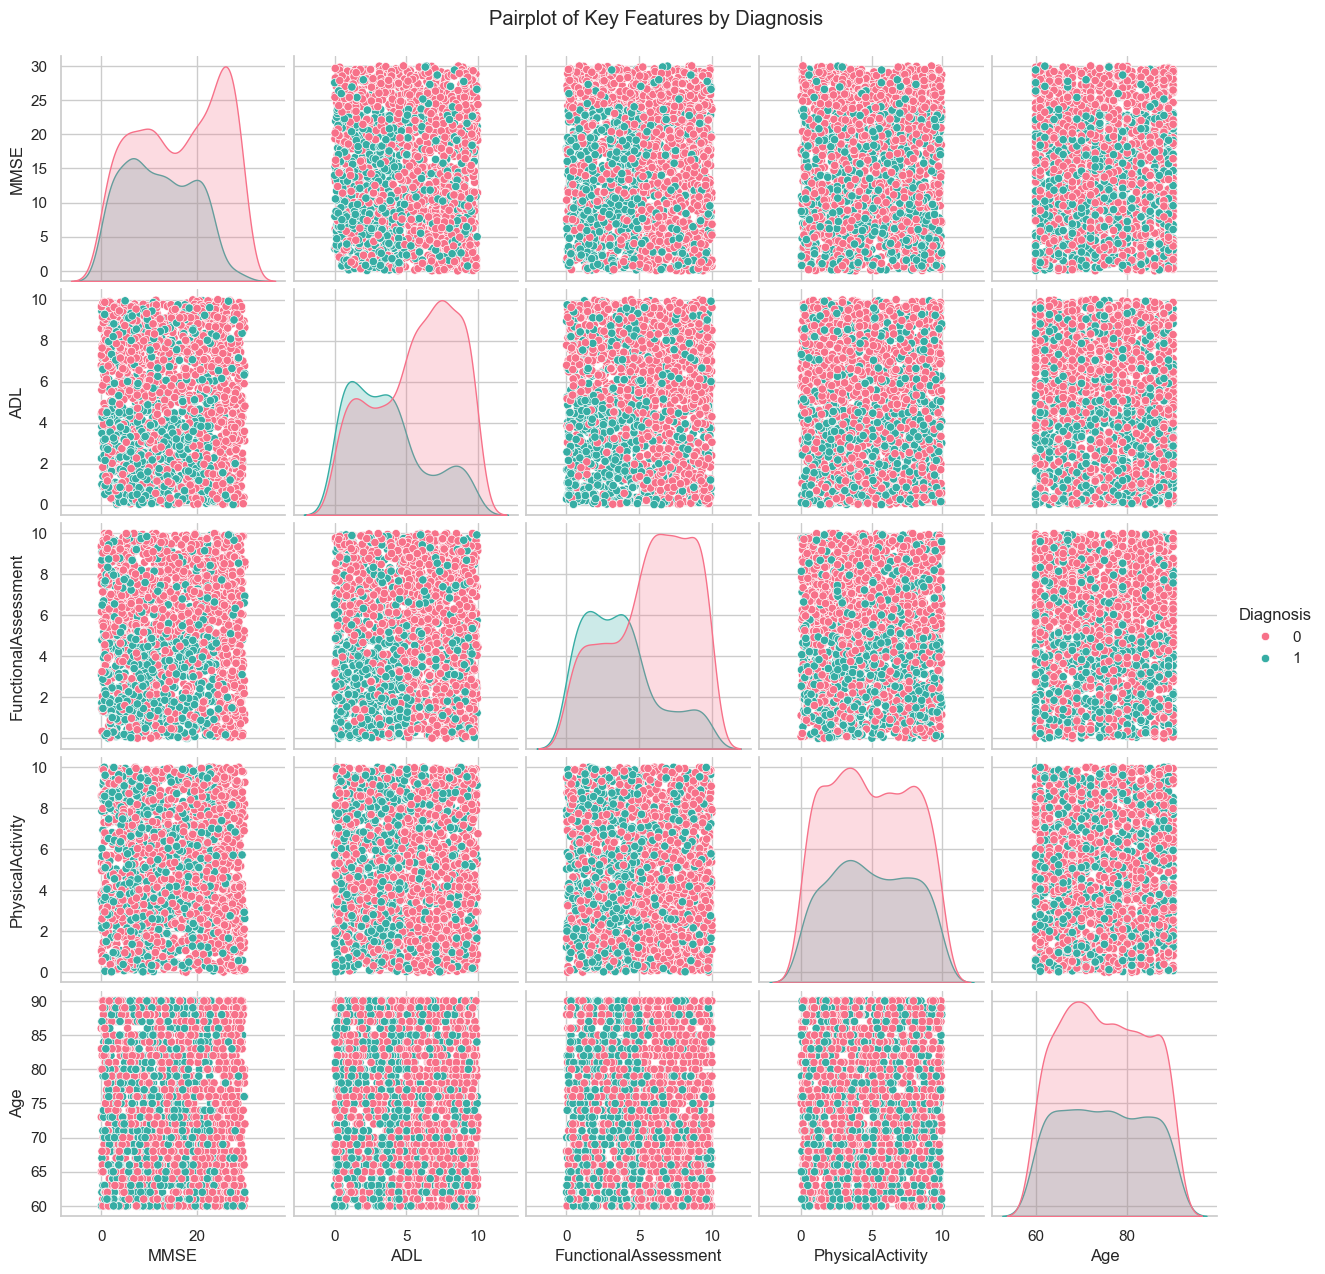

In [55]:
top_features = ["MMSE", "ADL", "FunctionalAssessment", "PhysicalActivity", "Age", "Diagnosis"]
sns.pairplot(df[top_features], hue="Diagnosis", palette="husl")
plt.suptitle("Pairplot of Key Features by Diagnosis", y=1.02)
plt.show()

## Outlier Detection Visuals (Boxplots per Feature)

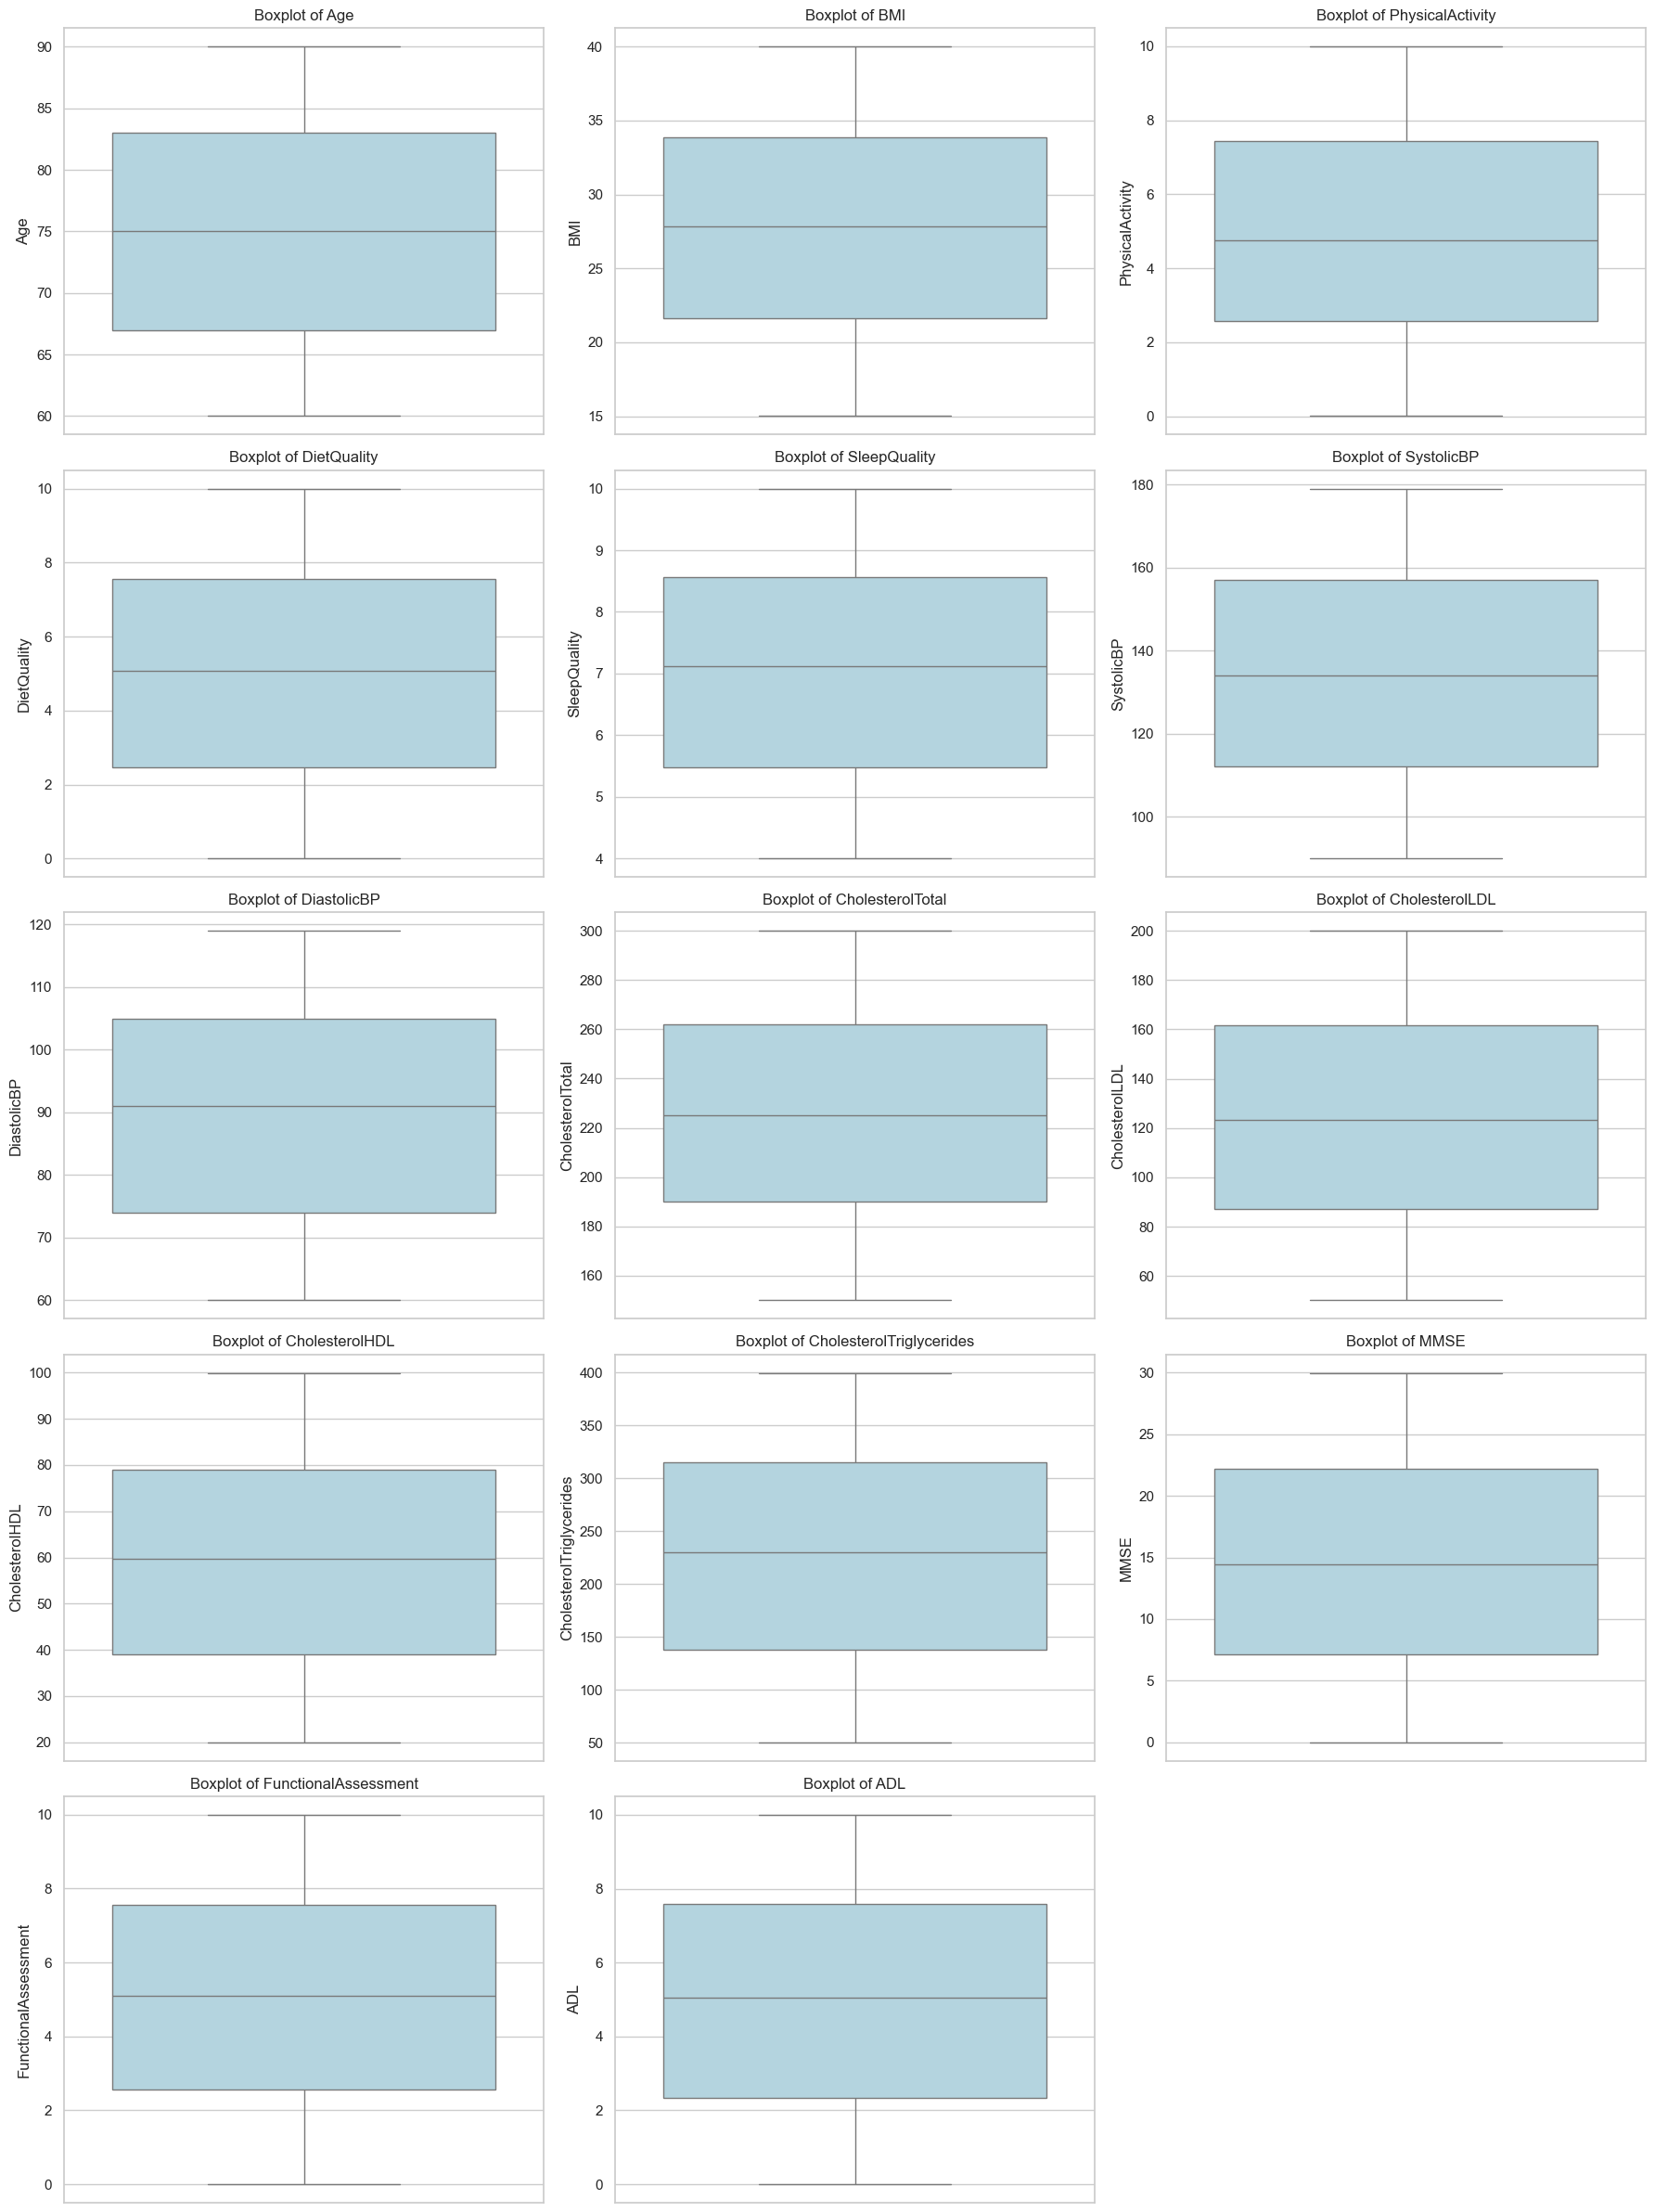

In [60]:
# Plot individual boxplots for each continuous variable to inspect raw distribution
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]

plt.figure(figsize=(18, 24))
for idx, col in enumerate(continuous_features):
    plt.subplot(5, 3, idx + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()


 ## Zero Variance / Low Variance Feature Check

In [63]:
# Check for columns with no variation
low_variance = df.nunique().sort_values()
print("Columns with lowest number of unique values:")
display(low_variance.head())


Columns with lowest number of unique values:


Diagnosis       2
Hypertension    2
HeadInjury      2
Depression      2
Diabetes        2
dtype: int64

## Skewness Check

In [66]:
# Check skewness of continuous features
skewed = df[continuous_features].skew().sort_values(ascending=False)
print("Skewness of continuous features:")
display(skewed)


Skewness of continuous features:


Age                         0.045964
PhysicalActivity            0.044973
CholesterolHDL              0.042206
CholesterolLDL              0.036233
MMSE                        0.032382
SystolicBP                  0.009971
DietQuality                -0.012058
CholesterolTotal           -0.018674
BMI                        -0.026715
ADL                        -0.030436
CholesterolTriglycerides   -0.032923
FunctionalAssessment       -0.034576
DiastolicBP                -0.054470
SleepQuality               -0.069630
dtype: float64

-----------------------

## Final Summary: EDA Insights for Predicting Alzheimer’s
The exploratory analysis provides strong support for the project goal defined in Notebook 01: identifying clinical and behavioral indicators that predict Alzheimer’s diagnosis.

Key findings:

Patients with Alzheimer's consistently show lower MMSE, FunctionalAssessment, and ADL scores, which reflect cognitive decline and difficulty in daily tasks.

Binary features such as Confusion, Forgetfulness, and Disorientation are more common among diagnosed patients.

The correlation matrix confirms that cognitive and behavioral features are closely linked to diagnosis.

Lifestyle and medical features (such as BMI, Hypertension, and Diabetes) show weaker but still useful patterns, suggesting they may support prediction when combined with stronger indicators.

## Notebook Summary

------------------------